In [1]:
import bolift
import pandas as pd
import numpy as np
import cloudpickle

/Users/maykcaldas/miniconda3/envs/bolift/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (5.0, 5.0 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

import random

np.random.seed(0)
random.seed(0)

# RF baseline

## Experiment outputs

In [355]:
df = pd.read_csv('Data/processed_data.csv')
df.drop(['OD'], axis=1, inplace=True)
df.groupby(['Temperature(C)', 'Doping(%)', 'Time(min)']).count()

Dimension1(nm)  Dimension2(nm)  \
Temperature(C) Doping(%) Time(min)                                   
0              1.00      10                      1               1   
                         60                      1               1   
               3.00      10                      1               1   
                         60                      1               1   
               5.00      10                      1               1   
                         60                      1               1   
               10.00     10                      1               1   
                         60                      1               1   
25             0.25      60                      2               2   
               0.50      60                      5               5   
               0.75      60                      2               2   
               1.00      10                      1               1   
                         60                      5               5   
                         180                     1               1   
               1.25      60                      2               2   
               1.50      60                      1               1   
               1.75      60                      1               1   
               2.00      60                      2               2   
               2.50      60                      1               1   
               3.00      10                      1               1   
                         60                      3               3   
                         180                     1               1   
               5.00      10                      1               1   
                         60                      6               6   
                         180                     1               1   
               10.00     10                      1               1   
                         60                      2               2   
                         180                     1               1   
50             1.00      10                      1               1   
                         60                      1               1   
               3.00      10                      1               1   
                         60                      1               1   
               5.00      10                      1               1   
                         60                      1               1   
               10.00     10                      1               1   
                         60                      1               1   

                                    Dilution(%)  Nano_stock_vol(mL)  \
Temperature(C) Doping(%) Time(min)                                    
0              1.00      10                   1                   1   
                         60                   1                   1   
               3.00      10                   1                   1   
                         60                   1                   1   
               5.00      10                   1                   1   
                         60                   1                   1   
               10.00     10                   1                   1   
                         60                   1                   1   
25             0.25      60                   2                   2   
               0.50      60                   5                   5   
               0.75      60                   2                   2   
               1.00      10                   1                   1   
                         60                   5                   5   
                         180                  1                   1   
               1.25      60                   2                   2   
               1.50      60                   1                   1   
               1.75      60                   1                   1   
               2.00      6

In [356]:
index = df.keys().tolist().index('Experiment')
features = df.keys()[:index]
labels = df.keys()[index+1:-6]
features, labels


(Index(['Dimension1(nm)', 'Dimension2(nm)', 'Dilution(%)', 'Nano_stock_vol(mL)',
        'Diluted_vol(mL)', 'AgConc(M)', 'AgMass(mg)', 'MeOH_vol(mL)',
        'H2O_vol(mL)', 'Doping(%)', 'AgSol(uL)', 'Time(min)', 'Temperature(C)'],
       dtype='object'),
 Index(['Peak1', 'Peak2', 'Area1', 'Area2', 'QY'], dtype='object'))

In [357]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def train_model(train, test):
    model = XGBRegressor(
    eval_metric=mean_absolute_error 
    )

    X_train, y_train = train
    X_test, y_test = test
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5)
    
    return model

models = {}
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(train_df.keys())

for i, k in enumerate(labels):
    # print(k, i, labels[i])
    train = (train_df[features], train_df[labels[i]])
    test = (test_df[features], test_df[labels[i]])
    models[k] = train_model(train, test)

    

Index(['Dimension1(nm)', 'Dimension2(nm)', 'Dilution(%)', 'Nano_stock_vol(mL)',
       'Diluted_vol(mL)', 'AgConc(M)', 'AgMass(mg)', 'MeOH_vol(mL)',
       'H2O_vol(mL)', 'Doping(%)', 'AgSol(uL)', 'Time(min)', 'Temperature(C)',
       'Experiment', 'Peak1', 'Peak2', 'Area1', 'Area2', 'QY',
       'Fl_Wavelengths', 'Fluorescence', 'Fluorescence_norm',
       'Abs_Wavelengths', 'Absorbance', 'Absorbance_norm'],
      dtype='object')
[0]	validation_0-rmse:359.75572	validation_0-mean_absolute_error:359.70666
[1]	validation_0-rmse:253.80450	validation_0-mean_absolute_error:253.73497
[2]	validation_0-rmse:178.94692	validation_0-mean_absolute_error:178.84827
[3]	validation_0-rmse:126.06843	validation_0-mean_absolute_error:125.92834
[4]	validation_0-rmse:88.73074	validation_0-mean_absolute_error:88.53155
[5]	validation_0-rmse:62.38813	validation_0-mean_absolute_error:62.10453
[6]	validation_0-rmse:43.83401	validation_0-mean_absolute_error:43.42942
[7]	validation_0-rmse:30.81071	validation_0-me

[16]	validation_0-rmse:6.13075	validation_0-mean_absolute_error:3.19333
[17]	validation_0-rmse:6.19453	validation_0-mean_absolute_error:2.83896
[18]	validation_0-rmse:6.13854	validation_0-mean_absolute_error:2.53828
[19]	validation_0-rmse:6.10940	validation_0-mean_absolute_error:2.32013
[20]	validation_0-rmse:6.09471	validation_0-mean_absolute_error:2.20910
[21]	validation_0-rmse:6.08662	validation_0-mean_absolute_error:2.13824
[22]	validation_0-rmse:6.08126	validation_0-mean_absolute_error:2.08524
[23]	validation_0-rmse:6.07954	validation_0-mean_absolute_error:2.07066
[24]	validation_0-rmse:6.10270	validation_0-mean_absolute_error:2.06055
[25]	validation_0-rmse:6.09803	validation_0-mean_absolute_error:2.04358
[26]	validation_0-rmse:6.11004	validation_0-mean_absolute_error:2.02919
[27]	validation_0-rmse:6.10467	validation_0-mean_absolute_error:2.02021
[28]	validation_0-rmse:6.10013	validation_0-mean_absolute_error:2.01498
[29]	validation_0-rmse:6.09661	validation_0-mean_absolute_error:

/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:16.03470	validation_0-mean_absolute_error:10.94074
[36]	validation_0-rmse:16.05057	validation_0-mean_absolute_error:10.94466
[37]	validation_0-rmse:16.01662	validation_0-mean_absolute_error:10.93487
[0]	validation_0-rmse:0.22881	validation_0-mean_absolute_error:0.19944
[1]	validation_0-rmse:0.20386	validation_0-mean_absolute_error:0.16345
[2]	validation_0-rmse:0.18732	validation_0-mean_absolute_error:0.14044
[3]	validation_0-rmse:0.17577	validation_0-mean_absolute_error:0.11779
[4]	validation_0-rmse:0.17445	validation_0-mean_absolute_error:0.11013
[5]	validation_0-rmse:0.17471	validation_0-mean_absolute_error:0.10819
[6]	validation_0-rmse:0.17500	validation_0-mean_absolute_error:0.10382
[7]	validation_0-rmse:0.17665	validation_0-mean_absolute_error:0.10361
[8]	validation_0-rmse:0.17861	validation_0-mean_absolute_error:0.10454
[9]	validation_0-rmse:0.18036	validation_0-mean_absolute_error:0.10598
[10]	validation_0-rmse:0.18205	validation_0-mean_absolute_error:0.10

/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Peak1 [513.95575] [513.]
Peak2 [635.0317] [626.]
Area1 [0.11967383] [0.29502976]
Area2 [0.7189688] [0.61171975]
QY [0.08931901] [0.14119516]


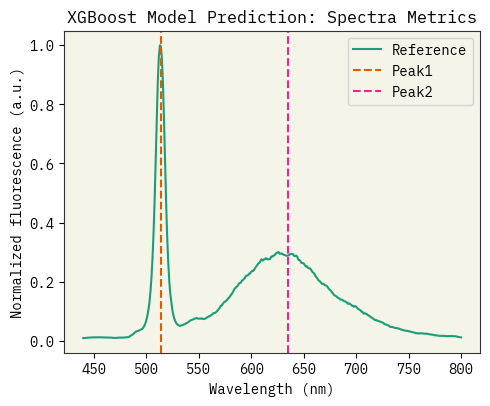

In [359]:
k = 0
sample = test_df.iloc[k:k+1]
feats = sample[features]
labs = sample[labels]

def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

for k in labels:
    # print(k, rmse(models[k].predict(feats), labs[k].values))
    print(k, models[k].predict(feats), labs[k].values)

w = [float(a) for a in sample.iloc[0]['Fl_Wavelengths'][1:-1].split(',')]
i = [float(a) for a in sample.iloc[0]['Fluorescence_norm'][1:-1].split(',')]

# plt.figure(figsize=(6, 4))
plt.plot(w, i, color="C0", label="Reference")
# plt.title(f"{sample.iloc[0]['Experiment']}: {sample.iloc[0]['Temperature(C)']}°C, {sample.iloc[0]['Doping(%)']}%, {sample.iloc[0]['Time(min)']}min")
plt.title(f"XGBoost Model Prediction: Spectra Metrics")
plt.axvline(x = models['Peak1'].predict(sample[features]), color = 'C1', linestyle = '--', label = 'Peak1')
plt.axvline(x = models['Peak2'].predict(sample[features]), color = 'C3', linestyle = '--', label = 'Peak2')
# change plt figsize
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized fluorescence (a.u.)")
plt.tight_layout()
plt.legend()
plt.show()

## Spectra output

In [345]:
df = pd.read_csv('Data/fl_spectra_data.csv')
df.drop(['OD'], axis=1, inplace=True)
df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']).count()

Dimension1(nm)  \
Experiment            Temperature(C) Doping(%) Time(min)                   
1_NPL-4_(5-31-22)     25             1.25      60                    361   
                                     2.50      60                    361   
                                     5.00      60                    361   
                                     10.00     60                    361   
2_NPL-4_(6-1-22)      25             0.25      60                    361   
                                     0.50      60                    361   
                                     0.75      60                    361   
                                     1.00      60                    361   
                                     1.25      60                    361   
                                     1.50      60                    361   
                                     1.75      60                    361   
                                     2.00      60                    361   
                                     3.00      60                    361   
3_NPL-11_(12-26-22)   25             0.50      60                    361   
                                     1.00      60                    361   
                                     2.00      60                    361   
                                     3.00      60                    361   
                                     5.00      60                    361   
4_NPL-17_(5-3-23)     25             0.50      60                    361   
                                     0.75      60                    361   
                                     1.00      60                    361   
                                     5.00      60                    361   
5_NPL-17_(5-22-23)    25             0.25      60                    361   
                                     0.50      60                    361   
                                     1.00      60                    361   
                                     5.00      60                    361   
6_NPL-6_C.L._(7-7-23) 25             0.50      60                    361   
                                     5.00      60                    361   
7_NPL-12_(3-8-23)     0              3.00      10                    361   
                                               60                    361   
                                     10.00     10                    361   
                                               60                    361   
                      25             3.00      10                    361   
                                               60                    361   
                                               180                   361   
                                     10.00     10                    361   
                                               60                    361   
                                               180                   361   
                      50             3.00      10                    361   
                                               60                    361   
                                     10.00     10                    361   
                                               60                    361   
8_NPL-13_(3-8-23)     0              1.00      10                    361   
                                               60                    361   
                                     5.00      10                    361   
                                               60                    361   
                      25             1.00      10                    361   
                                               60                    361   
                                               180                   361   
                                     5.00      10                    361   
                                               60                    361   
                              

In [346]:
index = df.keys().tolist().index('Experiment')
features = list(df.keys()[:index]) + ['Wavelength(nm)']
labels = ['Fluorescence_norm']
features, labels

(['Dimension1(nm)',
  'Dimension2(nm)',
  'Dilution(%)',
  'Nano_stock_vol(mL)',
  'Diluted_vol(mL)',
  'AgConc(M)',
  'AgMass(mg)',
  'MeOH_vol(mL)',
  'H2O_vol(mL)',
  'Doping(%)',
  'AgSol(uL)',
  'Time(min)',
  'Temperature(C)',
  'Wavelength(nm)'],
 ['Fluorescence_norm'])

In [347]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def train_model(train, test):
    model = XGBRegressor(
    eval_metric=mean_absolute_error 
    )
    
    X_train, y_train = train[train.columns.difference(['Fluorescence', 'Fluorescence_norm'])], train['Fluorescence_norm']
    X_test, y_test = test[test.columns.difference(['Fluorescence', 'Fluorescence_norm'])], test['Fluorescence_norm']
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5)
    
    return model

def test_model(model, validation):
    val_feats = validation[validation.columns.difference(['Fluorescence', 'Fluorescence_norm'])]
    val_labels = validation["Fluorescence_norm"]

    pred = model.predict(val_feats)
    return (pred, val_labels.to_numpy(), val_feats['Wavelength(nm)'].to_numpy())

In [ ]:
one_out = []
i=0
for group, validation in df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']):
    data = df.copy()
    exp, T, d, t = group
    validation = validation[features + labels]

    # validation = data.query(
    #     f'`Temperature(C)` == {T} & `Doping(%)` == {d} & `Time` == {t}'
    # )
    train_df = data.drop(validation.index)
    train, test = train_test_split(train_df[features + labels], test_size=0.2, random_state=42)

    model = train_model(train, test)

    prediction = test_model(model, validation)
    one_out.append((group, prediction))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


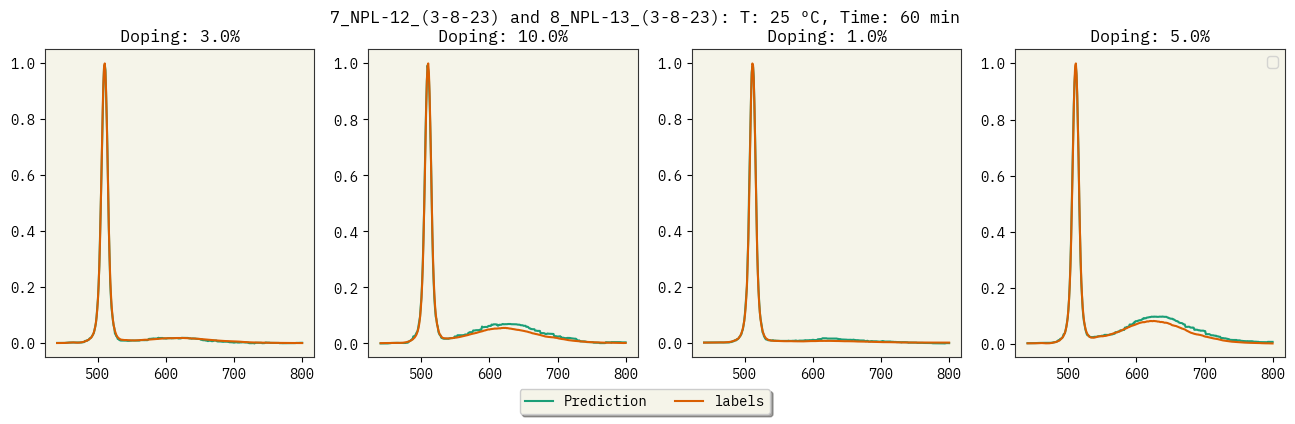

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
i=0
for group, predictions in one_out:
    axs = axs.flatten()
    exp, T, d, t = group
    if exp not in ["8_NPL-13_(3-8-23)", "7_NPL-12_(3-8-23)"] or T != 0.0 or t != 60:
        continue
    # title = f"{exp}: T: {T}ºC, Doping: {d}%, Time: {t}min"
    title = f"Doping: {d}%"

    if i == 0:
        axs[i].plot(predictions[2], predictions[0], color="C0", label='Prediction')
        axs[i].plot(predictions[2], predictions[1], color="C1", label='labels')
    else:
        axs[i].plot(predictions[2], predictions[0], color="C0")
        axs[i].plot(predictions[2], predictions[1], color="C1")
    axs[i].set_title(title)

    i+=1 
    # plt.savefig(f'preds/{group}.png')
fig.legend(loc='center', bbox_to_anchor=(0.5,0), fancybox=True, shadow=True, ncol=2)
fig.suptitle(f"7_NPL-12_(3-8-23) and 8_NPL-13_(3-8-23): T: 25 ºC, Time: 60 min")
plt.legend()
plt.show()


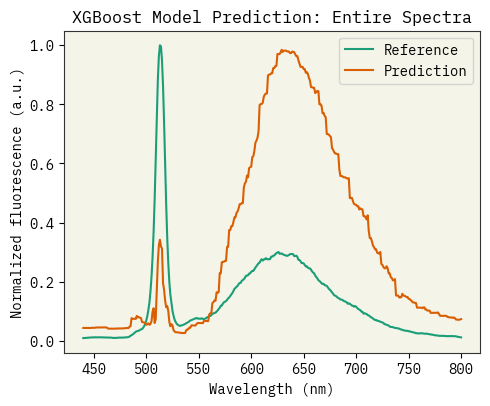

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

i=0
for group, predictions in one_out:
    if i == 0:
        exp, T, d, t = group
        title = f"{exp}: T: {T}ºC, Doping: {d}%, Time: {t}min"
        plt.figure()
        sns.lineplot(x=predictions[2], y=predictions[1], label='Reference')
        sns.lineplot(x=predictions[2], y=predictions[0], label='Prediction')
        plt.legend()
        # plt.savefig(f'preds/{group}.png')
        fig.legend(loc='center', bbox_to_anchor=(0.5,0), fancybox=True, shadow=True, ncol=2)
        # plt.title(title)
        plt.title("XGBoost Model Prediction: Entire Spectra")
        plt.legend()
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Normalized fluorescence (a.u.)")
        plt.tight_layout()
        plt.show()
    i += 1



### Evaluate predictions

In [78]:
import numpy as np 

def _get_peaks(x, y):
    peaks = []
    th = 0.001
    for i in range(1, len(x)-1):
        if y[i] > y[i-1]+th and y[i] > y[i+1]+th:
            peaks.append((x[i], y[i]))
    return peaks

def get_peaks(x, y):
    x = np.array(x)
    p1_i = np.where(x == 450)[0][0]
    p1_e = np.where(x == 550)[0][0]
    p2_i = np.where(x == 550)[0][0]
    p2_e = np.where(x == 700)[0][0]

    x1 = x[p1_i:p1_e]
    y1 = y[p1_i:p1_e]
    x2 = x[p2_i:p2_e]
    y2 = y[p2_i:p2_e]

    return x1[np.argmax(y1)], x2[np.argmax(y2)]

def get_area_under_peaks(x, y, norm=None):
    if not norm:
        return np.trapz(y, x)
    
    x = np.array(x)
    p1_i = np.where(x == 450)[0][0]
    p1_e = np.where(x == 550)[0][0]
    p2_i = np.where(x == 550)[0][0]
    p2_e = np.where(x == 700)[0][0]

    x1 = x[p1_i:p1_e]
    y1 = y[p1_i:p1_e]
    x2 = x[p2_i:p2_e]
    y2 = y[p2_i:p2_e]

    return np.trapz(y1, x1)/norm, np.trapz(y2, x2)/norm

def process_spectrum(x, y, norm_area):
    peaks = get_peaks(x, y)
    areas = get_area_under_peaks(x, y, norm_area)
    return peaks, areas

In [79]:
def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

pred_dict = {
    "Peak1": [],
    "Peak2": [],
    "Area1": [],
    "Area2": [],
    "Distance_peaks": []
}
label_dict = {
    "Peak1": [],
    "Peak2": [],
    "Area1": [],
    "Area2": [],
    "Distance_peaks": []
}

for group, predictions in one_out:
    pred_peak = get_peaks(predictions[2], predictions[0])
    pred_norm_area = get_area_under_peaks(predictions[2], predictions[0])
    pred_area = get_area_under_peaks(predictions[2], predictions[0], norm=pred_norm_area)

    label_peak = get_peaks(predictions[2], predictions[1])
    label_norm_area = get_area_under_peaks(predictions[2], predictions[1])
    label_area = get_area_under_peaks(predictions[2], predictions[1], norm=label_norm_area)
    
    pred_dict["Peak1"].append(pred_peak[0])
    pred_dict["Peak2"].append(pred_peak[1])
    pred_dict["Area1"].append(pred_area[0])
    pred_dict["Area2"].append(pred_area[1])
    pred_dict["Distance_peaks"].append(pred_peak[1] - pred_peak[0])

    label_dict["Peak1"].append(label_peak[0])
    label_dict["Peak2"].append(label_peak[1])
    label_dict["Area1"].append(label_area[0])
    label_dict["Area2"].append(label_area[1])
    label_dict["Distance_peaks"].append(label_peak[1] - label_peak[0])
    
    #plot
    # exp, T, d, t = group
    # title = f"{exp}: T: {T}ºC, Doping: {d}%, Time: {t}min"
    # plt.figure()
    # sns.lineplot(x=predictions[2], y=predictions[0], label='Prediction').set(title=title)
    # sns.lineplot(x=predictions[2], y=predictions[1], label='label')
    # plt.legend()
    # plt.show()    

for k in pred_dict.keys():
    print(k, rmse(np.array(pred_dict[k]), np.array(label_dict[k])))

Peak1 2.7677995385710803
Peak2 26.792856190730074
Area1 0.183312348486732
Area2 0.15250504094001105
Distance_peaks 27.082216094171994


# bolift

In [9]:
import os
import cloudpickle
import bolift
import seaborn as sns
from dotenv import load_dotenv
load_dotenv("../.env", override=True)

True

## Predicting peaks

In [14]:
df = pd.read_csv('Data/procedures.tsv', sep="\t")
prompts = df['prompt'].tolist()
peaks1 = df['peak1'].tolist()
peaks2 = df['peak2'].tolist()

import numpy as np
indexes = np.arange(len(prompts))
np.random.shuffle(indexes)
split = (len(indexes)-12)/len(indexes)

train_indexes = indexes[:int(split*len(indexes))]
test_indexes = indexes[int(split*len(indexes)):]

In [361]:
asktell1 = bolift.AskTellFewShotTopk(
    prefix="Complete the scoring ranking the last experiment."\
          " Each answer should be numeric and ends with ###." \
          " Use the following information to complete the prompt: \n",
    x_formatter=lambda x: f"the experimental procedure: {x}",
    y_name="first peak in the fluorescence spectrum",
    y_formatter=lambda y: f"{y:.2f}",
    model="gpt-3.5-turbo",
    selector_k=5,
    temperature=0.7
)

asktell2 = bolift.AskTellFewShotTopk(
    prefix="Complete the scoring ranking the last experiment."\
          " Each answer should be numeric and ends with ###." \
          " Use the following information to complete the prompt: \n",
    x_formatter=lambda x: f"the experimental procedure: {x}",
    y_name="second peak in the fluorescence spectrum",
    y_formatter=lambda y: f"{y:.2f}",
    model="gpt-3.5-turbo",
    selector_k=5,
    temperature=0.7
)

for i in train_indexes:
    asktell1.tell(prompts[i], peaks1[i])

for i in train_indexes:
    asktell2.tell(prompts[i], peaks2[i])

In [295]:
yhat=[]
y=[]
for i in test_indexes:
  yhat1 = asktell1.predict(prompts[i])
  yhat2 = asktell2.predict(prompts[i])
  print(f"{yhat1.mean():.2f}+/-{yhat1.std():.2f} : {peaks1[i]} // {yhat2.mean():.2f}+/-{yhat2.std():.2f} : {peaks2[i]}")

509.00+/-3.35 : 509.0 // 620.00+/-16.55 : 624.0
512.00+/-0.63 : 511.0 // 635.40+/-4.80 : 550.0
510.00+/-2.53 : 510.0 // 627.00+/-16.55 : 620.0
504.20+/-10.80 : 514.0 // 621.00+/-16.55 : 550.0
513.40+/-0.80 : 513.0 // 615.60+/-32.80 : 632.0
511.00+/-1.26 : 513.0 // 640.80+/-11.07 : 624.0
511.00+/-3.35 : 510.0 // 587.40+/-20.16 : 619.0
508.40+/-1.20 : 510.0 // 620.00+/-16.55 : 624.0
510.20+/-1.47 : 510.0 // 620.00+/-16.55 : 604.0
500.40+/-9.22 : 514.0 // 629.20+/-8.21 : 619.0
511.00+/-1.10 : 510.0 // 597.40+/-8.91 : 625.0
510.60+/-1.50 : 510.0 // 623.20+/-4.12 : 614.0


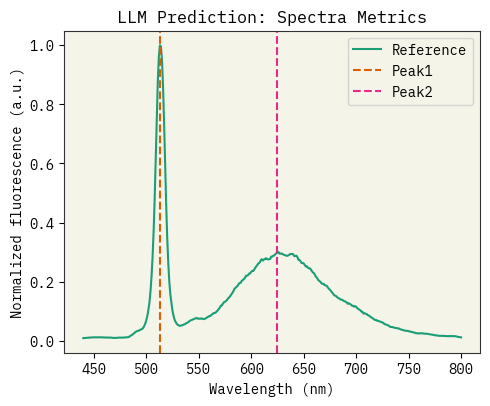

In [364]:
i=0
for group, predictions in one_out:
    if i == 0:
        exp, T, d, t = group
        title = f"{exp}: T: {T}ºC, Doping: {d}%, Time: {t}min"
        plt.figure()
        sns.lineplot(x=predictions[2], y=predictions[1], label='Reference')
        plt.axvline(x = asktell1.predict(prompts[0]).mean(), color = 'C1', linestyle = '--', label = 'Peak1')
        plt.axvline(x = asktell2.predict(prompts[0]).mean(), color = 'C3', linestyle = '--', label = 'Peak2')
        fig.legend(loc='center', bbox_to_anchor=(0.5,0), fancybox=True, shadow=True, ncol=2)
        # plt.title(title)
        plt.title("LLM Prediction: Spectra Metrics")
        plt.legend()
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Normalized fluorescence (a.u.)")
        plt.tight_layout()
        plt.show()
    i += 1

## Testing prediction

In [28]:
df = pd.read_csv('Data/procedures.tsv', sep="\t")
prompts = df['prompt'].tolist()
labels_f = df['obj_f'].to_list()

In [29]:
import numpy as np
indexes = np.arange(len(prompts))
np.random.shuffle(indexes)
split = (len(indexes)-12)/len(indexes)

train_indexes = indexes[:int(split*len(indexes))]
test_indexes = indexes[int(split*len(indexes)):]

In [30]:
asktell = bolift.AskTellFewShotTopk(
    prefix="Complete the distance between the fluorescence peaks in the spectra measured for the last experiment."\
          " Each answer should be numeric and ends with ###." \
          " Use the following information to complete the prompt: \n",
    x_formatter=lambda x: f"the experimental procedure: {x}",
    y_name="the product of the quantum yield with the area under the fluorescence peak at 650 nm",
    y_formatter=lambda y: f"{y:.2f}",
    model="gpt-3.5-turbo",
    selector_k=5,
    temperature=0.7,
)

system_message_path = "Data/system_message.txt"
inv_system_message_path = "Data/inv_system_message.txt"

if os.path.exists(system_message_path):
    with open(system_message_path, "r") as f:
        system_message = f.read()
else:
    system_message = ""

if os.path.exists(inv_system_message_path):
    with open(inv_system_message_path, "r") as f:
        inv_system_message = f.read()
else:
    inv_system_message = ""

for i in train_indexes:
  if labels_f[i] >= 0:
    asktell.tell(prompts[i], labels_f[i])

In [45]:
yhat=[]
y=[]
for i in test_indexes:
  yhat.append(asktell.predict(prompts[i] , system_message=""))
  y.append(labels_f[i])

/Users/maykcaldas/miniconda3/envs/bolift/lib/python3.10/site-packages/bolift/asktell.py:369: UserWarning: No system message provided for prediction. Using default. 
Not clearly specifying the task for the LLM usually decreases its performance considerably.
  warnings.warn("No system message provided for prediction. Using default. \nNot clearly specifying the task for the LLM usually decreases its performance considerably.")
/Users/maykcaldas/miniconda3/envs/bolift/lib/python3.10/site-packages/bolift/asktell.py:369: UserWarning: No system message provided for prediction. Using default. 
Not clearly specifying the task for the LLM usually decreases its performance considerably.
  warnings.warn("No system message provided for prediction. Using default. \nNot clearly specifying the task for the LLM usually decreases its performance considerably.")
/Users/maykcaldas/miniconda3/envs/bolift/lib/python3.10/site-packages/bolift/asktell.py:369: UserWarning: No system message provided for predict

In [ ]:
for i in test_indexes:
  print(f"{prompts[i]} => {labels_f[i]}")

# [f"{i.mean():.2f}" for i in yhat], y

|        predicted        |   label    |     AE     | 
|    0.34   +/-   0.11    |    0.01    |    0.33    |
|    0.08   +/-   0.02    |    0.06    |    0.02    |
|    0.09   +/-   0.03    |    0.10    |    0.01    |
|    0.08   +/-   0.03    |    0.04    |    0.04    |
|    0.03   +/-   0.04    |    0.05    |    0.01    |
|    0.04   +/-   0.04    |    0.10    |    0.05    |
|    0.02   +/-   0.01    |    0.04    |    0.02    |
|    0.10   +/-   0.06    |    0.08    |    0.02    |
|    0.04   +/-   0.04    |    0.03    |    0.01    |
|    0.02   +/-   0.04    |    0.09    |    0.07    |
|    0.03   +/-   0.04    |    0.03    |    0.00    |
|    1.14   +/-   1.46    |    0.04    |    1.10    |

              RMSE: 0.33              


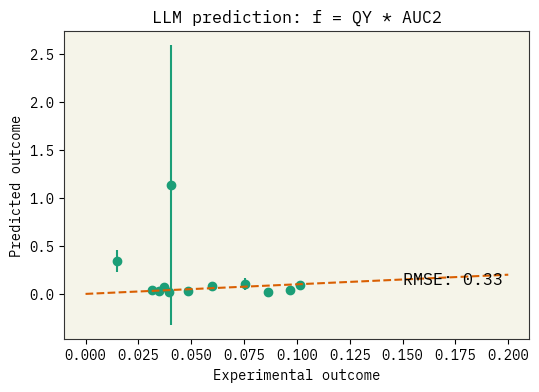

In [46]:
def rmse(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.mean((a - b)**2))

sum = 0
print(f"| {'predicted':^23s} | {'label':^10s} | {'AE':^10s} | ")
n = 0
for ihat, i in zip(yhat, y):
  n+=1
  mae = abs(ihat.mean()-i)
  print(f"| {ihat.mean():^10.2f}+/-{ihat.std():^10.2f} | {i:^10.2f} | {mae:^10.2f} |")
  sum += mae
print(f"\n{'RMSE: ':>20s}{rmse([ihat.mean() for ihat in yhat], y):<18.2f}")

import matplotlib.pyplot as plt
y_plot    = np.array(y)[np.where(np.array(y) >= 0)]
yhat_plot = np.array([ihat.mean() for ihat in yhat])[np.where(np.array(y) >= 0)]
yerr_plot = np.array([ihat.std() for ihat in yhat])[np.where(np.array(y) >= 0)]
plt.figure(figsize=(6, 4))
plt.xlabel('Experimental outcome')
plt.ylabel('Predicted outcome')
plt.plot(y_plot, yhat_plot, 'o')
plt.errorbar(y_plot, yhat_plot, yerr=yerr_plot, fmt='none')
plt.title('LLM prediction: f = QY * AUC2')
plt.plot((0,0.2), (0,0.2), '--')
plt.text(0.15, 0.10, f"RMSE: {rmse(y_plot, yhat_plot):.2f}", fontsize=12)
plt.show()

## Bayesian optimization

In [10]:
proc_list = pd.read_csv('Data/procedures.tsv', sep='\t')
prompts, labels_f = proc_list['prompt'].tolist(), proc_list['obj_f'].tolist()

pool_type = "processed"
pool_list = pd.read_csv(f"Data/pool_{pool_type}.txt", sep=';')
# pool = cloudpickle.load(open(f'Data/pool_{pool_type}.pkl', 'rb'))
pool = bolift.Pool(pool_list['prompt'].to_list())


In [11]:
asktell = bolift.AskTellFewShotTopk(
    prefix="Complete the distance between the fluorescence peaks in the spectra measured for the last experiment."\
          " Each answer should be numeric and ends with ###." \
          " Use the following information to complete the prompt: \n",
    x_formatter=lambda x: f"the experimental procedure: {x}",
    y_name="the product of the quantum yield with the area under the fluorescence peak at 650 nm",
    y_formatter=lambda y: f"{y:.2f}",
    model="gpt-3.5-turbo",
    selector_k=5,
    temperature=0.7
)

system_message_path = "Data/system_message.txt"
inv_system_message_path = "Data/inv_system_message.txt"

if os.path.exists(system_message_path):
    with open(system_message_path, "r") as f:
        system_message = f.read()
    print("Loaded system message")
else:
    system_message = ""

if os.path.exists(inv_system_message_path):
    with open(inv_system_message_path, "r") as f:
        inv_system_message = f.read()
    print("Loaded inv system message")
else:
    inv_system_message = ""

print(pool)

for p,l in zip(prompts, labels_f):
  asktell.tell(p, float(l))
  try:
    pool.choose(p)
  except:
    continue

print(pool)

Loaded system message
Loaded inv system message
Pool of 4536 items with 0 selected


/Users/maykcaldas/miniconda3/envs/bolift/lib/python3.10/site-packages/langchain_core/utils/utils.py:161: UserWarning: WARNING! logprobs is not default parameter.
                logprobs was transferred to model_kwargs.
                Please confirm that logprobs is what you intended.
  warnings.warn(
/Users/maykcaldas/miniconda3/envs/bolift/lib/python3.10/site-packages/langchain_core/utils/utils.py:161: UserWarning: WARNING! logprobs is not default parameter.
                logprobs was transferred to model_kwargs.
                Please confirm that logprobs is what you intended.
  warnings.warn(


Pool of 4536 items with 0 selected


In [12]:
max(labels_f)

0.1721152273629967

In [14]:
selected = asktell.ask(pool, aq_fxn="expected_improvement", k=5, inv_filter=15, aug_random_filter=1, inv_system_message=inv_system_message, system_message=system_message)
i = 0
for prompt, p in zip(selected[0], asktell.predict(selected[0], system_message=system_message)):
    print(f"{prompt} => {p.mean():.4f} +/- {p.std():.4f}\n")
    # print(f"{i+1}: {prompt}")
    i+=1


Stock nanoplatelets have dimensions 28.639 nm by 9.008 nm and the optical density of 100x hexanes dilution of stock is 0.300% recorded at 512 nm. 0.500 mL nanoplatelets stock is diluted 7x by hexanes using 3.500 mL for each trial of doping. Silver acetate solution of 0.00070 M is made with 3.500 mg of silver acetate in 21.397 mL of MeOH and 8.559 mL of water. 2.000 % Ag doping requires 76.264 uL of silver doping solution, respectively. The reaction was performed at 1000 rpm for 60.0 minutes at 25.000 oC. Fluorescence of each doped sample was collected as a 30x dilution with hexanes. => 0.4904 +/- 0.4042

Stock nanoplatelets have dimensions 33.654 nm by 6.926 nm and the optical density of 100x hexanes dilution of stock is 0.150% recorded at 512 nm. 0.250 mL nanoplatelets stock is diluted 7x by hexanes using 1.750 mL for each trial of doping. Silver acetate solution of 0.00070 M is made with 14.000 mg of silver acetate in 85.589 mL of MeOH and 34.236 mL of water. 5.000 % Ag doping requir

In [ ]:
i=0
for prompt in selected[0]:
    print(f"{i+1}: {prompt}\n")
    i+=1

1: Stock nanoplatelets have dimensions 33.654 nm by 6.926 nm and the optical density of 100x hexanes dilution of stock is 0.300% recorded at 512 nm. 0.500 mL nanoplatelets stock is diluted 7x by hexanes using 3.500 mL for each trial of doping. Silver acetate solution of 0.00070 M is made with 14.000 mg of silver acetate in 85.589 mL of MeOH and 34.236 mL of water. 10.000 % Ag doping requires 344.528 uL of silver doping solution, respectively. The reaction was performed at 1000 rpm for 60.0 minutes at 0.000 oC. Fluorescence of each doped sample was collected as a 30x dilution with hexanes.

2: Stock nanoplatelets have dimensions 19.835 nm by 14.762 nm and the optical density of 100x hexanes dilution of stock is 0.300% recorded at 512 nm. 0.250 mL nanoplatelets stock is diluted 7x by hexanes using 1.750 mL for each trial of doping. Silver acetate solution of 0.00600 M is made with 14.000 mg of silver acetate in 9.985 mL of MeOH and 3.994 mL of water. 5.000 % Ag doping requires 12.623 uL 